<a href="https://colab.research.google.com/github/Nov05/playground-fireball/blob/master/notebooks/2019_10_19_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-10-19

project repository   
https://github.com/Nov05/playground-fireball  

data source   
https://catalog.data.gov/dataset/fireball-and-bolide-reports    
https://cneos.jpl.nasa.gov/fireballs/   

Latitude and longitude formats   
http://www.geomidpoint.com/latlon.html   

In [2]:
!pip install colorlover
# Successfully installed colorlover-0.3.0

# Imports

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import colorlover as cl
from IPython.display import HTML

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Procssing

In [4]:
url1 = "https://raw.githubusercontent.com/Nov05/playground-fireball/master/data/Fireball_And_Bolide_Reports.csv"
url2 = "https://raw.githubusercontent.com/Nov05/playground-fireball/master/data/cneos_fireball_data.csv"
df = pd.read_csv(url2)
print(df.shape)
df.head()

(802, 10)


,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2019-10-10 16:16:36,44.3N,122.9E,47.3,14.1,1.5,-12.9,-5.4,2.060000e+11,0.570
1,2019-09-28 10:40:20,12.5S,107.2W,52.0,20.4,-10.1,11.2,13.7,2.300000e+10,0.082
2,2019-09-27 13:35:46,25.7N,28.4W,NaN,NaN,NaN,NaN,NaN,3.400000e+10,0.120
3,2019-09-14 12:39:34,38.6S,33.5W,38.0,15.9,-12.9,8.1,4.6,1.090000e+11,0.330
4,2019-09-13 02:02:04,18.6S,126.9E,27.4,13.5,5.2,-8.1,9.5,4.200000e+10,0.140


In [5]:
df.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,373.000000,208.000000,208.000000,208.000000,208.000000,8.020000e+02,802.00000
mean,36.229491,17.691346,0.409135,-2.059135,-0.550481,9.757955e+11,1.51737
std,10.362336,5.969886,10.772678,11.114925,10.361430,1.407188e+13,16.84953
min,15.200000,9.800000,-35.400000,-43.500000,-31.200000,2.000000e+10,0.07300
25%,29.600000,13.775000,-7.625000,-10.525000,-8.425000,3.300000e+10,0.11000
50%,34.300000,16.500000,0.600000,-2.750000,0.850000,6.700000e+10,0.21000
75%,40.700000,19.200000,8.550000,5.150000,7.250000,1.530000e+11,0.44000
max,74.000000,49.000000,27.800000,31.200000,27.000000,3.750000e+14,440.00000


In [6]:
df.isnull().sum()

Peak Brightness Date/Time (UT)           0
Latitude (deg.)                        183
Longitude (deg.)                       183
Altitude (km)                          429
Velocity (km/s)                        594
vx                                     594
vy                                     594
vz                                     594
Total Radiated Energy (J)                0
Calculated Total Impact Energy (kt)      0
dtype: int64

In [7]:
# convert datetime
df['peak_brightness'] = pd.to_datetime(df.iloc[:,0], infer_datetime_format=True)
df['year'] = df['peak_brightness'].dt.year
df['month'] = df['peak_brightness'].dt.month
df['hour'] = df['peak_brightness'].dt.hour
cols = ['Peak Brightness Date/Time (UT)',
        'peak_brightness',
        'year', 'month', 'hour']
df[cols].sample(5)

,Peak Brightness Date/Time (UT),peak_brightness,year,month,hour
798,1993-10-31 03:39:27,1993-10-31 03:39:27,1993,10,3
21,2019-05-04 15:35:46,2019-05-04 15:35:46,2019,5,15
265,2012-02-12 05:25:52,2012-02-12 05:25:52,2012,2,5
309,2010-10-08 09:58:01,2010-10-08 09:58:01,2010,10,9
708,1998-01-08 16:10:21,1998-01-08 16:10:21,1998,1,16


In [8]:
# latitude and longitude 
# Degrees only formats (DDD + compass direction)
"""
41 N and 120 W
41°N and 120°W
N41.092 and W120.8362
90S and 0E (South Pole)
"""
df['latitude'] = df.iloc[:,1].apply(lambda x: 0 if x is np.nan else (float(x[:-1]) if x[-1]=='N' else float(x[:-1])*(-1)))
df['longitude'] = df.iloc[:,2].apply(lambda x: 0 if x is np.nan else (float(x[:-1]) if x[-1]=='E' else float(x[:-1])*(-1)))
df[['latitude', 'longitude']].sample(5)

,latitude,longitude
444,0.0,0.0
634,-13.6,-5.8
728,32.2,29.0
801,-4.1,124.3
739,-47.3,20.6


# Profile Report

In [9]:
pandas_profiling.ProfileReport(df.iloc[:,3:])

Number of variables,13
Number of observations,802
Total Missing (%),26.9%
Total size in memory,81.5 KiB
Average record size in memory,104.1 B
Numeric,11
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1


# Velocity

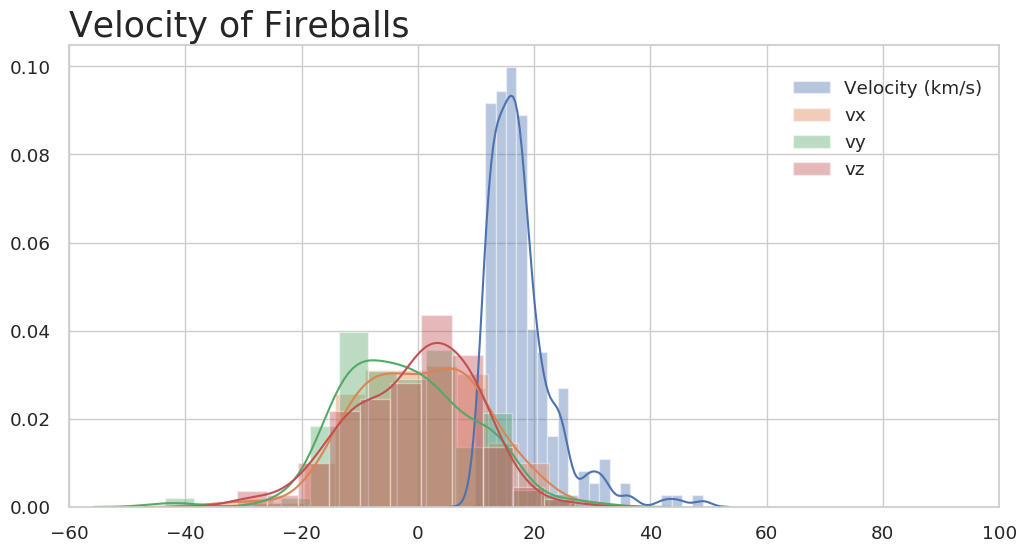

In [10]:
cols = ['Velocity (km/s)',
        'vx',
        'vy',
        'vz']
sns.set(font_scale=1.2)  
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
for i in cols:
    ax = sns.distplot(df[i].dropna())
    ax.set(xlabel='')
plt.xlim(-60,100)
fig.legend(labels=cols,
           bbox_to_anchor=(0.9,0.85), 
           loc="upper right",  
           bbox_transform=fig.transFigure)
plt.title('Velocity of Fireballs', 
          fontsize=25, loc='left');

# Time

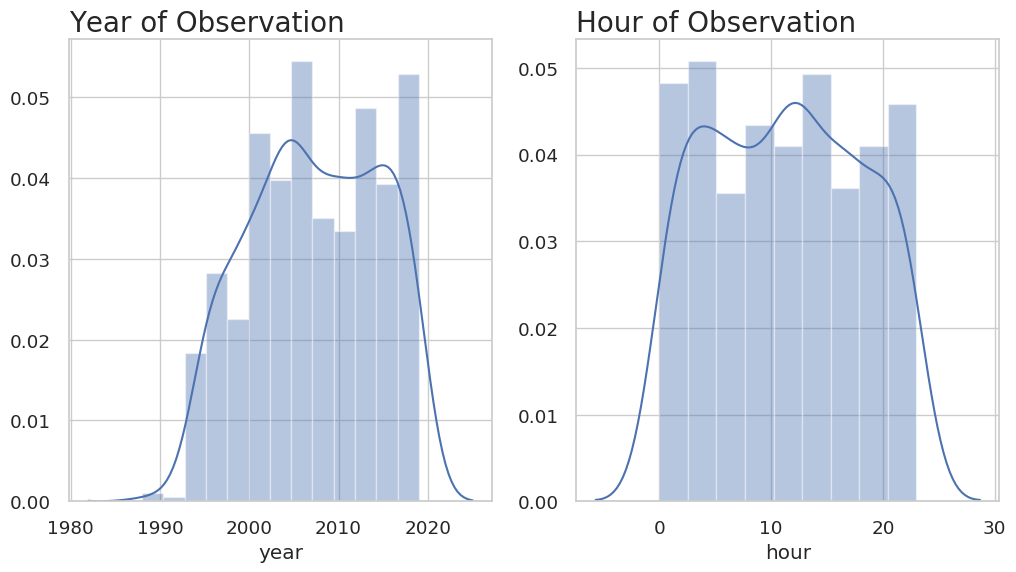

In [11]:
sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(df['year'], ax=axes[0])
sns.distplot(df['hour'], ax=axes[1])
axes[0].set_title('Year of Observation',
                  fontsize=20, loc='left')
axes[1].set_title('Hour of Observation',
                  fontsize=20, loc='left');

# Energy

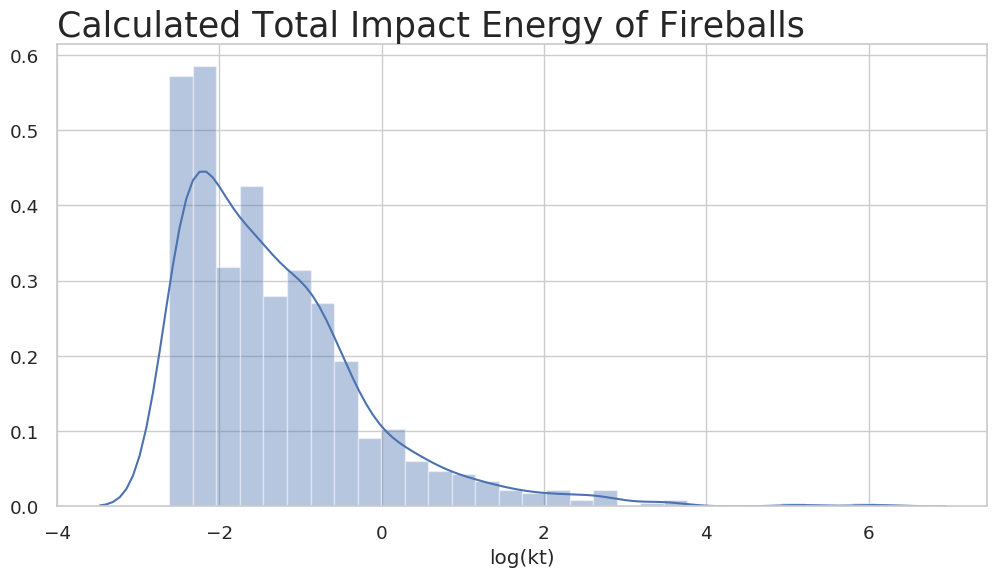

In [12]:
sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(np.log(df['Calculated Total Impact Energy (kt)']))
plt.xlabel('log(kt)')
plt.title('Calculated Total Impact Energy of Fireballs',
          fontsize=25, loc='left');

# Velocity vs. Energy

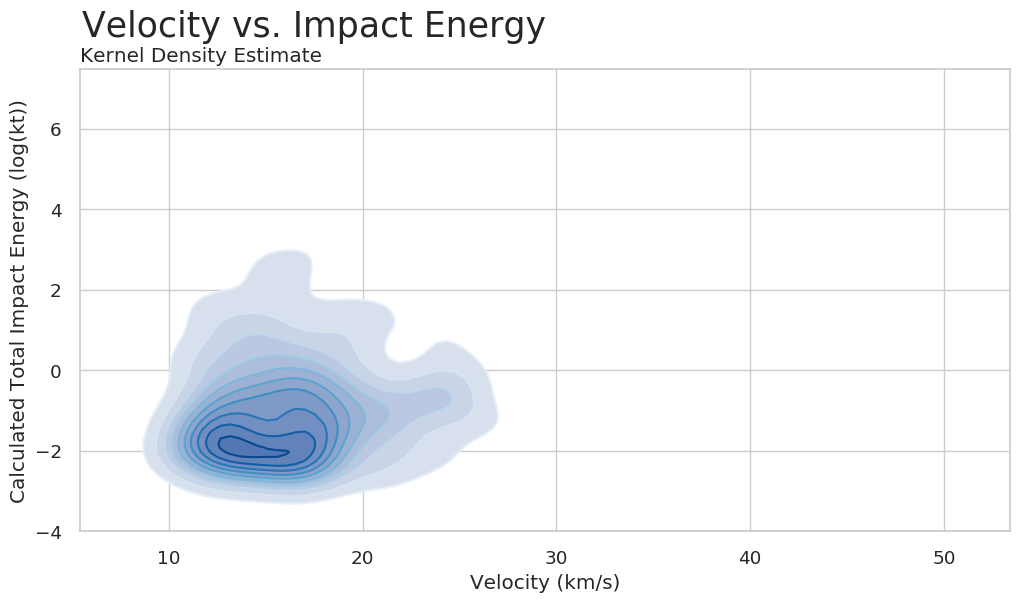

In [14]:
cols = ['Velocity (km/s)', 'Calculated Total Impact Energy (kt)']
df_tmp = df[cols].dropna()

sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.kdeplot(df_tmp[cols[0]],
            np.log(df_tmp[cols[1]]),
            shade_lowest=False,
            shade=True)
sns.kdeplot(df_tmp[cols[0]],
            np.log(df_tmp[cols[1]]),
            cmap="Blues")
plt.ylabel('Calculated Total Impact Energy (log(kt))')
plt.suptitle('Velocity vs. Impact Energy',
             fontsize=25, x=0.32)
plt.title('Kernel Density Estimate',
          loc='left');

# Custom colorscale

In [26]:
blues = cl.scales['9']['seq']['Blues']
print(blues)
HTML(cl.to_html(blues))

['rgb(247,251,255)', 'rgb(222,235,247)', 'rgb(198,219,239)', 'rgb(158,202,225)', 'rgb(107,174,214)', 'rgb(66,146,198)', 'rgb(33,113,181)', 'rgb(8,81,156)', 'rgb(8,48,107)']


In [16]:
blues500 = cl.interp(blues, 500) # Map color scale to 500 bins
HTML(cl.to_html(blues500))

In [17]:
deepblues = []
for i in range(9):
    deepblues.append(blues500[-1-int(250/9*i)])
deepblues = deepblues[::-1]
HTML(cl.to_html(deepblues))

# Plotly 2D World Map

https://plot.ly/python/scatter-plots-on-maps/    
https://plot.ly/python/reference/     

In [18]:
df1 = df[(df['latitude']!=0) & (df['longitude']!=0)]
df1['impact'] = np.log1p(np.log1p(df1['Calculated Total Impact Energy (kt)']))
# scaler = MinMaxScaler()
# df1['impact_norm'] = scaler.fit_transform(df1['impact'].values.reshape(-1,1))
df1['impact_norm'] = df1['impact'] * 50
df1['text'] = (df1['peak_brightness'].astype(str)
               + '<br>Energy (kt) '
               + df1['Calculated Total Impact Energy (kt)'].astype(str)
               + '<br>Velocity (km/s) '
               + df1['Velocity (km/s)'].astype(str))
df2 = df1[df1['Velocity (km/s)'].isnull()==False]
df3 = df1[df1['Velocity (km/s)'].isnull()==True]

colorscales = ["Greens", "YlOrRd", "Bluered", "RdBu", "Reds", 
               "Blues", "Picnic", "Rainbow", "Portland", "Jet", 
               "Hot", "Blackbody", "Earth", "Electric", "Viridis", 
               "Cividis"]
color_rdbu = [
    [0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'],
    [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'],
    [1, 'rgb(217,30,30)']
]
# create custom colorscale "deepblues"
blues = cl.scales['9']['seq']['Blues']
blues500 = cl.interp(blues, 500) # Map color scale to 500 bins
deepblues = []
for i in range(9):
    deepblues.append(blues500[-1-int(250/9*i)])
deepblues = deepblues[::-1]

colorscale = deepblues #'Blues'
# colorscale_rgb = [i[1] for i in colorscale]
landcolor = "rgb(250, 250, 250)" #"rgb(212, 212, 212)"

trace1 = go.Scattergeo(
    lon = df2['longitude'],
    lat = df2['latitude'],
    text = df2['text'],
    mode = 'markers',
    marker = dict(
        size = df2['impact_norm'],
        opacity = 0.7,
        autocolorscale = False,
        line = dict(width=0.1),
        color = df2['Velocity (km/s)'],
        colorscale = colorscale,
        cmin = 0,
        cmax = df2['Velocity (km/s)'].max(),
        colorbar_title = 'Velocity<br>(km/s)',
        colorbar = dict(
            x=1.01, 
            len=0.7, 
            thickness=10,
            outlinewidth=0),
        ),
    name='Velocity<br>Known',
    )
trace2 = go.Scattergeo(
    lon = df3['longitude'],
    lat = df3['latitude'],
    text = df3['text'],
    mode = 'markers',
    marker = dict(
        size = df3['impact_norm'],
        opacity = 0.2,
        autocolorscale = False,
        line = dict(width=0.1),
        color = 'gray',
        ),
    name='Velocity<br>Unknown',
    )
data = [trace1, trace2]

layout = go.Layout(
    title=dict(
        text='Fireballs Reported by US Government Sensors',
        x=0.015, y=0.98),
    width=1300,
    height=600,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30),
    geo = dict(
        landcolor=landcolor,),
    legend=dict(x=1.01),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Plotly 3D Scatter

In [19]:
df.columns

Index(['Peak Brightness Date/Time (UT)', 'Latitude (deg.)', 'Longitude (deg.)',
       'Altitude (km)', 'Velocity (km/s)', 'vx', 'vy', 'vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)',
       'peak_brightness', 'year', 'month', 'hour', 'latitude', 'longitude'],
      dtype='object')

In [20]:
cols = ['latitude', 'longitude', 'Altitude (km)']
print(df[cols].isnull().sum())
df[cols].describe().loc[['count', 'min', 'max']]

latitude           0
longitude          0
Altitude (km)    429
dtype: int64


,latitude,longitude,Altitude (km)
count,802.0,802.0,373.0
min,-83.7,-179.7,15.2
max,88.5,180.0,74.0


In [21]:
condition = (
    (df['latitude']!=0) &
    (df['longitude']!=0) &
    (df['Altitude (km)']!=0) &
    (df['Altitude (km)'].isnull()==False)
)
df4 = df[condition]
print(df4.shape)
df4[cols].sample(2)

(372, 16)


,latitude,longitude,Altitude (km)
7,21.9,-130.4,39.8
343,-4.2,120.6,19.1


https://plot.ly/python/3d-axes/#background-and-grid-color   

In [22]:
cols = ['latitude', 'longitude', 'Altitude (km)']
condition = (
    (df['latitude']!=0) &
    (df['longitude']!=0) &
    (df['Altitude (km)']!=0) &
    (df['Altitude (km)'].isnull()==False)
)
df4 = df[condition]
df4['text'] = (df4['peak_brightness'].astype(str)
               + '<br>Energy (kt) '
               + df4['Calculated Total Impact Energy (kt)'].astype(str)
               + '<br>Velocity (km/s) '
               + df4['Velocity (km/s)'].astype(str))
x = df4['latitude']
y = df4['longitude']
z = df4['Altitude (km)']
# marker size
s = np.log1p(np.log1p(df4['Calculated Total Impact Energy (kt)'])) * 20
t = df4['text']

redblues = [
    [0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'],
    [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'],
    [1, 'rgb(217,30,30)']
]
redblues_rgb = [i[1] for i in redblues]
colorscale = redblues

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=s,
        color=z, # set color to an array/list of desired values
        colorscale=colorscale, 
        opacity=1,
        showscale=True,
        colorbar=dict(x=1, 
                      len=0.5, 
                      thickness=10,
                      outlinecolor='white', 
                      outlinewidth=0,
                      title=dict(text="Altitude<br>(km)", font=dict(size=10))
                     ),
        line=dict(width=0.001, color='black')
    ),
    hovertext=t,
    hoverlabel=dict(bgcolor='whitesmoke'),
    projection=dict(x=dict(show=True, opacity=0.1, scale=0.4),
                    y=dict(show=True, opacity=0.1, scale=0.4),
                    z=dict(show=True, opacity=0.1, scale=0.4),
                   )
)

data = [trace1]
layout = go.Layout(
    autosize=False,
    width=700,
    height=600,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title=dict(
        text='Fireballs Reported by US Government Sensors',
        x=0.015, y=0.95),
    scene=dict(xaxis=dict(title="x = "+cols[0],
                          backgroundcolor="white",
                          gridcolor="lightgray",
                         ),
               yaxis=dict(title="y = "+cols[1],
                          backgroundcolor="white",
                          gridcolor="lightgray",
                         ),
               zaxis=dict(title="z = "+cols[2],
                          backgroundcolor="aliceblue",
                          gridcolor="lightgray",
                         ),
              ),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Save processed data to CSV

In [0]:
df.to_csv('01_processed.csv', index=False)